In [294]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import numpy as np
import scipy.fft as fft

# Funções

In [295]:
def extraicarac(sin,freq,bandas):
  #Extrai características estatísticas e espectrais de um conjunto de sinais de mesma dimensão temporal.
  #Inputs:
  #   - sin = numpy array (num de sinais x tempo)
  #   - freq = frequencia de amostragem dos sinais (Hz)
  #   - bandas = dicionario com a informação das bandas de frequencia a serem extraídas. 
  #              Formato:{'nome da banda (string)':[freqinicial, freqfinal]}
  #              Exemplo: 
  #              bandas={'delta 1':[0.5,2.5],'delta 2':[2.5,4],'teta 1':[4,6],'teta 2':[6,8], 'alfa':[8,12],'beta':[12,20],'gama':[10,45]}
  #Output: 
  #   - retorna um array de trechos x características e uma lista com os nomes das 
  # caracteristicas correspondentes ao array
    
  (S,X)=np.shape(sin) #S = numero de sinais sinais; X = tamanho dos sinais no tempo
  nc=15 #numero de caracteristicas que serao extraidas
  car=np.zeros((S,nc)) #matriz das caracteristicas
  nomesc=[None]*nc
  
  for s in range(S):

    #média
     car[s,0]=np.mean(sin[s,:])
     nomesc[0]='media'

    #variancia
     var0=np.var(sin[s,:],ddof=1)
     car[s,1]=var0
     nomesc[1]='variancia'

    #mobilidade
     x1=np.diff(sin[s,:])
     var1=np.var(x1,ddof=1)
     mob=var1/var0
     car[s,2]=mob
     nomesc[2]='mobilidade'
          
    #complexidade estatística
     x2=np.diff(x1)
     var2=np.var(x2,ddof=1)
     ce=(var2/var1-var1/var0)**(1/2)
     car[s,3]=ce
     nomesc[3]='complexidade'

    ##calculando o espectro:
     yf = np.abs(fft.fft(sin[s,:]-car[s,0]))**2 
     yf=yf/np.size(yf)
     yf=yf[0:X//2]
     xf = np.linspace(0.0, 1.0/(2.0/freq), X//2)  
     Yf=yf/np.sum(yf) 

    #frequência central do espectro
     car[s,4]=np.sum(xf*Yf)
     nomesc[4]='f-central'

    #potencia na frequencia central
     ifc=np.abs(xf-car[s,4])==np.min(np.abs(xf-car[s,4]))
     car[s,5]=yf[ifc]
     nomesc[5]='P na fc'

    #largura de banda do espectro
     car[s,6]=np.sqrt(np.sum(((xf-car[s,4])**2)*Yf))
     nomesc[6]='l-banda'

    #frequência de margem do espectro
     sw=np.cumsum(Yf)
     f=np.max(np.where(sw<=0.9)[0])
     car[s,7]=xf[f]
     nomesc[7]='f-margem'

    #potências espectrais normalizadas nas seguintes bandas: 
    #delta 1 (0.5 a 2.5Hz)
     for ib, b in enumerate(bandas):
        car[s,8+ib]=sum(Yf[((xf>=bandas[b][0]) & (xf<=bandas[b][1]))])
        nomesc[8+ib]=b

  return (car,nomesc)

In [296]:
P2ex1 = scipy.io.loadmat('P2ex1.mat')
P2ex2 = scipy.io.loadmat('P2ex2.mat')

# Questão 1

In [297]:
dados_controle = P2ex1.get('Controle')
dados_hipertensao = P2ex1.get('Hipertensao')
df_controle = pd.DataFrame(dados_controle)
df_hipertensao = pd.DataFrame(dados_hipertensao)
print(f'Shape controle: {df_controle.shape} \n Shape hiper: {df_hipertensao.shape}')

Shape controle: (179, 145) 
 Shape hiper: (205, 145)


In [298]:
df_controle

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,97.789053,98.109827,98.642264,99.241092,99.691786,99.872289,99.853931,99.861454,100.113092,100.648959,...,96.209224,96.843400,97.216974,97.339165,97.284354,97.127745,96.926795,96.742595,96.657124,96.749649
1,99.866386,99.231337,98.685948,98.256530,97.898481,97.596097,97.432849,97.570605,98.146373,99.158674,...,99.503832,99.438735,99.189333,99.022957,99.187451,99.764166,100.641259,101.606441,102.474843,103.156832
2,105.745841,104.509097,103.154597,102.226159,102.044198,102.564670,103.439027,104.229616,104.643701,104.647797,...,105.147005,105.664908,106.018870,106.019067,105.669550,105.157139,104.724818,104.519590,104.518831,104.578139
3,93.257908,92.748847,92.404754,92.435870,92.812521,93.295372,93.604976,93.610231,93.403259,93.211384,...,102.788483,103.414351,103.396734,102.772704,101.797680,100.827006,100.145713,99.842590,99.790402,99.729131
4,105.030270,105.845368,106.629912,107.180936,107.469126,107.617695,107.769401,107.950562,108.041467,107.878573,...,100.230589,100.038591,100.211697,100.715714,101.332665,101.779632,101.874598,101.639876,101.274808,101.018054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,100.911281,100.479947,100.742637,101.687190,103.012016,104.278891,105.142181,105.509117,105.539641,105.504800,...,106.166082,106.303941,105.970752,105.359712,104.808853,104.610514,104.873428,105.502093,106.278012,106.972806
175,108.775030,109.200450,109.869029,110.560679,110.997454,110.990236,110.546138,109.864473,109.219431,108.802879,...,110.662503,110.383015,109.623118,108.616256,107.654394,106.960970,106.625220,106.620059,106.869230,107.304700
176,102.887003,102.173324,101.402404,100.764912,100.283074,99.842874,99.322853,98.718347,98.169127,97.870319,...,100.295768,100.683046,100.768109,100.658038,100.664282,101.111068,102.124129,103.533674,104.954851,105.994683
177,90.891911,90.844519,91.035216,91.244918,91.247174,90.972266,90.558864,90.259142,90.265509,90.580459,...,98.286713,97.391942,96.223492,95.143803,94.406600,94.068047,94.029420,94.156692,94.379843,94.705751


In [299]:
4*60

240

In [300]:
fs = 0.1
signal_map = {
    'baixa': [0, 60],
    'alta': [60, 240],
}

In [301]:
# Classe patológica: hipertensão
caracteristicas, nomes = extraicarac(
    dados_hipertensao, fs, signal_map)
caracteristicas.shape

(205, 15)

In [302]:
nomes

['media',
 'variancia',
 'mobilidade',
 'complexidade',
 'f-central',
 'P na fc',
 'l-banda',
 'f-margem',
 'baixa',
 'alta',
 None,
 None,
 None,
 None,
 None]

Exibindo valor médio de cada característica

In [303]:
np.mean(pd.DataFrame(caracteristicas))

/home/caiomorozini/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0      99.362420
1      40.646952
2       0.053677
3       0.423376
4       0.003515
5     328.653973
6       0.004193
7       0.006190
8       1.000000
9       0.000000
10      0.000000
11      0.000000
12      0.000000
13      0.000000
14      0.000000
dtype: float64

## B

In [304]:
def remoutliers(padroes,p,method='desvio'):
    #Encontra outlires baseando-se em dois métodos possiveis:
    #  method = 'desvio': mediana mais/menos p x desvio
    #  method = 'quartis': quartis  +/- p x intervalo entre quartis
    # padroes = numpy array de uma característica ( N x 1)
    # p = numero de desvios ou de intervalos entre quartis a ser empregado 
    # retorna lista com as posicoes dos outliers no array
    if method =='desvio':
        md=np.median(padroes)
        std=np.std(padroes,ddof=1)
        th1=md+p*std
        th2=md-p*std
    elif method=='quartis':
        q3, q1 = np.percentile(padroes, [75 ,25])
        iqr=q3-q1
        th1=q3+p*iqr
        th2=q1-p*iqr
    outliers=(padroes>th1) | (padroes<th2)
    outs=[i for i, val in enumerate(outliers) if val]
    return outs

In [305]:
dados_controle.transpose()

array([[ 97.78905334,  99.8663857 , 105.74584072, ..., 102.88700294,
         90.89191054, 102.28529467],
       [ 98.10982706,  99.23133731, 104.50909708, ..., 102.17332385,
         90.84451939, 101.6716435 ],
       [ 98.64226353,  98.68594767, 103.15459694, ..., 101.40240436,
         91.03521609, 100.93262632],
       ...,
       [ 96.74259499, 101.6064407 , 104.51958983, ..., 103.53367422,
         94.15669169, 100.75041071],
       [ 96.65712432, 102.47484275, 104.51883082, ..., 104.95485143,
         94.379843  , 101.86135399],
       [ 96.74964871, 103.15683246, 104.57813911, ..., 105.99468316,
         94.70575147, 102.56242081]])

In [306]:
# Extraindo outliers
caracteristicas2, nomes = extraicarac(
    dados_controle, fs, signal_map)

In [307]:
nomes2 = [nome for nome in nomes if nome]

In [308]:
x = list()
for index, _ in enumerate(caracteristicas2):
    x.extend(remoutliers(caracteristicas2[index], p=1.5, method='quartis'))


In [309]:
y = list()
for out in x:
    if out not in y:
        y.append(out)

In [310]:
caracteristicas2.shape

(179, 15)

In [311]:
179 - len(y)
# Sobraram 176 padrões

176

## C

In [312]:
def normaliza(dados,metodo='linear',r=1):
    #Realiza a normalizacao de um conjunto de padroes
    # dados = numpy array com padroes de uma caracteristica N x 1
    # metodo ='linear' : normalizacao linear (padrao)
    #        = 'mmx': limitada entre -1 e 1
    #        = 'sfm': rescala nao linear no intervalo 0 a 1
    # r = parametro do metodo sfm (padrao =1)
    #A função retorna os dados normalizados
    if metodo=='linear':
        M=np.mean(dados)
        S=np.std(dados,ddof=1)
        dadosnorm=(dados-M)/S
    elif metodo=='mmx':
        dadosnorm=2*dados/(np.max(dados)-np.min(dados))
        dadosnorm=dadosnorm - (np.min(dadosnorm)+1)
    elif metodo=='sfm':
        x=dados-np.mean(dados)
        x=-x/(r*np.std(dados))
        dadosnorm=1/(1+np.exp(x))
    return dadosnorm

In [313]:
nomes

['media',
 'variancia',
 'mobilidade',
 'complexidade',
 'f-central',
 'P na fc',
 'l-banda',
 'f-margem',
 'baixa',
 'alta',
 None,
 None,
 None,
 None,
 None]

In [314]:
complexidade_classe_saudavel = caracteristicas2.transpose()[2]

In [315]:
complex_norm = normaliza(complexidade_classe_saudavel)

In [316]:
print(f"valor médio: {np.mean(complex_norm)}")

valor médio: 0.0


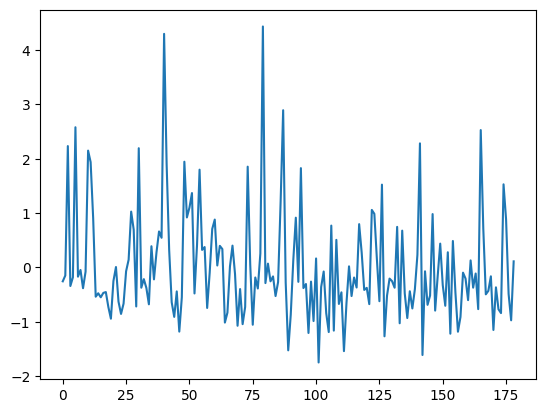

In [317]:
plt.plot(complex_norm)

# Questão 2

In [318]:
saudavel = P2ex2.get('dados1')
cancer = P2ex2.get('dados2')
df_dados1 = pd.DataFrame(saudavel)
df_dados2 = pd.DataFrame(cancer)
print(f'Shape dados1: {saudavel.shape} \n dados2 hiper: {cancer.shape}')

Shape dados1: (31, 80) 
 dados2 hiper: (31, 104)


## A

In [319]:
def PCA(dados, m):
    '''
    :param dados: matriz de LXN caracteristicas X padrões
    :param m: quantidade de features desejadas no novo espaço

    :return: tupla contendo:
        * os autovalores em ordem descrescente com seus indices correspondedo a
        cada coluna dos autovetores
        * autovetores matriz LXL (caracteristica por caracteristica)
        * dados_novo_espaco: matriz m x N depois de aplicada a PCA (redução do espaço de L
        para m e retirada de dependência linear)
        * erro_quadratico_medio: demonstra a porcentagem que essas features tranformadas
        representam de todo o espaço
    '''

    matriz_covariancia = np.cov(dados, ddof=0)
    #Retorna os autovalores e autovetores de uma matriz.
    #Retorna dois objetos, uma matriz 1-D contendo os autovalores de
    # a e uma matriz ou matriz quadrada 2-D
    # dos autovetores correspondentes (em colunas).
    # ou seja autovalores = [1, 2, 3]
    #autovetores:
    #               [
    #                   [0 2 6],
    #                   [0 3 1],
    #                   [2 2 4],
    #               ]
    #sendo cada coluna um vetor dessa forma 1 seria o autovalor de 0 0 2
    # 2 seria de 2 3 2 e 3 de 6 1 4
    #Os autovalores estão em ordem crescente
    #A coluna é o autovetor normalizado correspondente ao autovalor .
    autovalores, autovetores = np.linalg.eigh(matriz_covariancia)
    autovalores = autovalores[::-1]
    autovetores = autovetores[:, ::-1]

    #embora a função cuspa os autovetores nas colunas para a matempatica funcionar
    #precisamos usar eles nas linhas por isso fazemos a tranposição, assim temos:
    # A(m x L) * D(L x N) = NE(m X N)
    #ssim continuamos com os mesmos padrões mas reduzimos o espaço de L caracteristicas
    #para m, com uma operação matempatica que garante a não linearidade entre elas, para
    #testar basta tirar a covariancia das caracteristicas e observar que o resltado é uma
    #matriz diagonal onde a diaginal são exatamente os autovalores.
    dados_novo_espaco = autovetores[:, 0:m].T @ dados
    erro_quadratico_medio = 1 - (sum(autovalores[0:m]) / sum(autovalores))


    return (autovalores, autovetores, dados_novo_espaco, erro_quadratico_medio)


In [320]:
saudavel.shape

(31, 80)

In [321]:
aval_saudavel, avet_saudave, pca_saudavel, saudavel_erro_quadratico_medio = (
    PCA(saudavel, 4))
aval_cancer, avet_cancer, pca_cancer, cancer_erro = (
    PCA(cancer,4)
)

## A

In [322]:
pd.DataFrame(np.cov(pca_saudavel))

,0,1,2,3
0,1.598458e+01,-3.511160e-15,1.164182e-15,-1.494339e-15
1,-3.511160e-15,8.836596e+00,-2.231799e-15,6.890355e-16
2,1.164182e-15,-2.231799e-15,3.200317e+00,1.772170e-15
3,-1.494339e-15,6.890355e-16,1.772170e-15,2.898968e+00


A variância da quarta componente saudável é 2.899

In [323]:
pd.DataFrame(np.cov(pca_cancer))

,0,1,2,3
0,3.287735e+00,-9.094684e-17,-2.993527e-16,-4.275446e-17
1,-9.094684e-17,1.724187e+00,-5.916462e-16,3.089811e-16
2,-2.993527e-16,-5.916462e-16,9.876104e-01,5.231061e-16
3,-4.275446e-17,3.089811e-16,5.231061e-16,9.239963e-01


Variância da quarta componente para pacientes com cancer é 9.239963e-01

## B

In [324]:
pca_saudavel.shape

(4, 80)

In [325]:
np.mean(pca_saudavel[0,:])

1.0030196352205851

## Questão C

In [326]:
_, _, _, erro_saudavel = PCA(saudavel, 3)
_, _, _, erro_cancer = PCA(cancer, 3)


In [327]:
print(f"saudavel: {erro_saudavel} | cancer: {erro_cancer}")

saudavel: 0.30185779525805434 | cancer: 0.38322396775696466


## D

In [328]:
def ROC(valores, rotulos):

    '''
    :param valores: Todos os valores de uma dada característica
    :param rotulos: Os respectivos rótulos para cada valor
    :return: um vetor de verdadiros positivos e outro de falsos positivos
    '''

    #ATENÇÃO: A classe considerada negativa deve ser aquela que possui o menor
    # de todos os valores, caso essa condição n seja satisfeita irá ocorrer um espelhamento
    #no grafico e consequentemente em sua área. Digamos que a área era para ser 0.86, mas deu
    #0.14 note que é exatemente 1 - 0.86, você saberá se houve um espelhamento caso a sua
    #área tenha dado menor que 0.5 que seria o pior caso (com todas as caracteristicas sobrepostas)

    df_aux = pd.DataFrame(np.array([valores, rotulos]).T, columns=['valor', 'rotulo'])
    df_aux.sort_values('valor', inplace=True)
    df_aux.reset_index(inplace=True)

    VP_percent = []
    FP_percent = []
    thresholds = list(df_aux['valor'])
    thresholds = [min(thresholds) - 1] + thresholds + [max(thresholds) + 1]
    for valor in thresholds:
        VP = df_aux[(df_aux['valor'] >= valor) & (df_aux['rotulo'] == 1)].shape[0]
        FP = df_aux[(df_aux['valor'] >= valor) & (df_aux['rotulo'] == 0)].shape[0]
        VN = df_aux[(df_aux['valor'] < valor) & (df_aux['rotulo'] == 0)].shape[0]
        FN = df_aux[(df_aux['valor'] < valor) & (df_aux['rotulo'] == 1)].shape[0]

        FP_percent.append(FP / (FP + VN))
        VP_percent.append(VP / (VP + FN))



    return (FP_percent, VP_percent)


def AUC(VP, FP):

    '''
    :param VP: Vetor de valores verdadeiro positivos (eixo y, bases maior e menor trapézio)
    :param FP: Vetor de valores falso positivos (eixo x, altura do trapézio)
    :return: área abaixo da curva
    '''

    area = 0
    for i in range(len(VP) - 1):
        area += (VP[i] + VP[i + 1]) * (abs(FP[i + 1] - FP[i])) / 2

    return area


In [329]:
def calcula_AUC(
    caracteristica_um: np.array,
    caracteristica_dois: np.array
    ) -> float:
    c1_len, c2_len = len(caracteristica_um), len(caracteristica_dois)
    labels = [0] * c1_len + [1] * c2_len
    scores = list(caracteristica_um) + list(caracteristica_dois)
    FP, VP = ROC(scores, labels)
    return round(AUC(VP, FP), 4)

In [330]:
def calcula_AUC_todas_caracteristicas(
    classe1: pd.DataFrame,
    classe2: pd.DataFrame
    ) -> dict:
    response_auc = dict()
    caracteristicas = list(classe1.columns)
    for caracteristica in caracteristicas:
        c1, c2 = classe1[caracteristica], classe2[caracteristica]
        response_auc[caracteristica] = (
            calcula_AUC(c1.to_numpy(), c2.to_numpy())
        )
    return response_auc


In [331]:
df_pca_saudavel = pd.DataFrame(pca_saudavel.transpose())
df_pca_cancer = pd.DataFrame(pca_cancer.transpose())
aucs = calcula_AUC_todas_caracteristicas(df_pca_cancer, df_pca_saudavel)

In [332]:
response = dict()
for key, carac in aucs.items():
    if carac < 0.5:
        response[key] = round(1 - carac, 4)
    else:
        response[key] = carac
    

In [333]:
response

{0: 0.6304, 1: 0.953, 2: 0.5267, 3: 0.6198}

Selecionaria apenas a caracteristica 3 (posição 2) pois quanto mais próximo de 1 menos sobreposição (valor de 0.953)
as demais estão próximas de 0.5 que é o pior cenário